In [5]:
# Import dependencies
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [6]:
# create engine to historical prices sqlite db
engine = create_engine("sqlite:///test.sqlite")

In [7]:
eur_usd_df = pd.read_sql('select * from eur_usd',engine)
cad_usd_df = pd.read_sql('select * from cad_usd', engine)
jpy_usd_df = pd.read_sql('select * from jpy_usd', engine)

In [8]:
eur_usd_df

,Date,Open,High,Low,Close
0,01/01/24,1.1058,1.1080,1.1037,1.1047
1,01/02/24,1.1046,1.1056,1.0938,1.0940
2,01/03/24,1.0937,1.0967,1.0895,1.0922
3,01/04/24,1.0920,1.0975,1.0915,1.0946
4,01/05/24,1.0945,1.0998,1.0877,1.0939
...,...,...,...,...,...
258,12/26/24,1.0407,1.0432,1.0381,1.0425
259,12/27/24,1.0419,1.0446,1.0406,1.0428
260,12/30/24,1.0427,1.0459,1.0373,1.0408
261,12/31/24,1.0409,1.0426,1.0345,1.0355


In [9]:
# eur_usd_df[' Close']
def MA5(table):
    counter = 0
    avg5_list = []
    for x in table[' Close']:
        if(counter>4):
            avg5 = np.average([table[' Close'][counter - 5],
                               table[' Close'][counter - 4],
                               table[' Close'][counter - 3],
                               table[' Close'][counter - 2],
                               table[' Close'][counter - 1]])
            avg5_list.append(avg5)
        else:
            avg5_list.append(None)
        counter += 1

    return avg5_list


In [10]:
eur_usd_df[' MA5'] = MA5(eur_usd_df)
cad_usd_df[' MA5'] = MA5(cad_usd_df)
jpy_usd_df[' MA5'] = MA5(jpy_usd_df)
# print(jpy_usd_df[0:10])

In [11]:
def MA8(table):
    counter = 0
    avg8_list = []
    for x in table[' Close']:
        if(counter>7):
            avg8 = np.average([table[' Close'][counter - 8],
                               table[' Close'][counter - 7],
                               table[' Close'][counter - 6],
                               table[' Close'][counter - 5],
                               table[' Close'][counter - 4],
                               table[' Close'][counter - 3],
                               table[' Close'][counter - 2],
                               table[' Close'][counter - 1]])
            avg8_list.append(avg8)
        else:
            avg8_list.append(None)
        counter += 1

    return avg8_list

In [12]:
eur_usd_df[' MA8'] = MA8(eur_usd_df)
cad_usd_df[' MA8'] = MA8(cad_usd_df)
jpy_usd_df[' MA8'] = MA8(jpy_usd_df)
# jpy_usd_df[0:12]

In [13]:
def MA13(table):
    counter = 0
    avg13_list = []
    for x in table[' Close']:
        if(counter>12):
            avg13 = np.average([table[' Close'][counter - 13],
                                table[' Close'][counter - 12],
                                table[' Close'][counter - 11],
                                table[' Close'][counter - 10],
                                table[' Close'][counter - 9],
                                table[' Close'][counter - 8],
                                table[' Close'][counter - 7],
                                table[' Close'][counter - 6],
                                table[' Close'][counter - 5],
                                table[' Close'][counter - 4],
                                table[' Close'][counter - 3],
                                table[' Close'][counter - 2],
                                table[' Close'][counter - 1]])
            avg13_list.append(avg13)
        else:
            avg13_list.append(None)
        counter += 1

    return avg13_list

In [14]:
eur_usd_df[' MA13'] = MA13(eur_usd_df)
cad_usd_df[' MA13'] = MA13(cad_usd_df)
jpy_usd_df[' MA13'] = MA13(jpy_usd_df)
# jpy_usd_df[0:15]

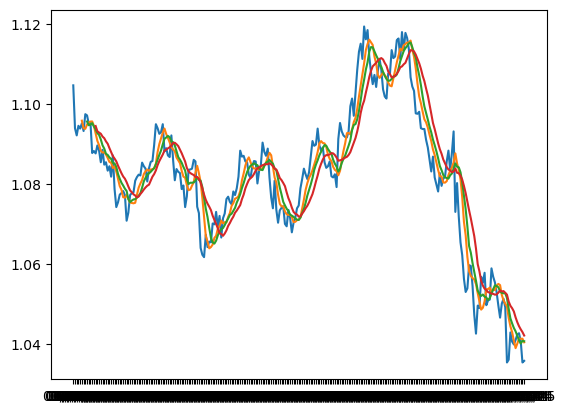

<Figure size 55000x55000 with 0 Axes>

In [15]:
plt.plot(eur_usd_df['Date'], eur_usd_df[' Close'], label='Close')
plt.plot(eur_usd_df['Date'], eur_usd_df[' MA5'], label= 'MA5')
plt.plot(eur_usd_df['Date'], eur_usd_df[' MA8'], label= 'MA8')
plt.plot(eur_usd_df['Date'], eur_usd_df[' MA13'], label= 'MA13')
plt.figure(figsize=(550,550))
plt.show()

In [16]:
def setup_buy_col(table):
        buy = []
        for row in eur_usd_df.iterrows():
                buy.append('Closed')
        return buy

def setup_prof_col(table):
        profit = []
        for row in eur_usd_df.iterrows():
                profit.append(0)
        return profit


In [17]:
eur_usd_df['Buy'] = setup_buy_col(eur_usd_df)
eur_usd_df['Profit'] = setup_prof_col(eur_usd_df)

cad_usd_df['Buy'] = setup_buy_col(cad_usd_df)
cad_usd_df['Profit'] = setup_prof_col(cad_usd_df)

jpy_usd_df['Buy'] = setup_buy_col(jpy_usd_df)
jpy_usd_df['Profit'] = setup_prof_col(jpy_usd_df)

In [18]:
eur_usd_df[30:60]

,Date,Open,High,Low,Close,MA5,MA8,MA13,Buy,Profit
30,02/12/24,1.0781,1.0808,1.0756,1.0773,1.07666,1.078900,1.081392,Closed,0
31,02/13/24,1.0772,1.0804,1.0700,1.0709,1.07726,1.078325,1.080523,Closed,0
32,02/14/24,1.0712,1.0736,1.0695,1.0729,1.07634,1.076288,1.079446,Closed,0
33,02/15/24,1.0728,1.0788,1.0724,1.0773,1.07544,1.075550,1.078477,Closed,0
34,02/16/24,1.0772,1.0791,1.0733,1.0778,1.07534,1.075925,1.078008,Closed,0
35,02/19/24,1.0777,1.0792,1.0761,1.0780,1.07524,1.076213,1.077492,Closed,0
36,02/20/24,1.0778,1.0841,1.0761,1.0809,1.07538,1.076288,1.077192,Closed,0
37,02/21/24,1.0808,1.0826,1.0790,1.0818,1.07738,1.076675,1.076708,Closed,0
38,02/22/24,1.0820,1.0891,1.0803,1.0824,1.07916,1.077113,1.076938,Closed,0
39,02/23/24,1.0823,1.0841,1.0812,1.0822,1.08018,1.077750,1.077562,Closed,0


In [ ]:
def algo(table):
    for index, row in table.iterrows():
        if (index>12):
            if (table['Buy'][index-1] == 'Closed'): # in closed position, want to check if should open position
                if ((table[' MA5'][index] > table[' MA8'][index]) & (table[' MA8'][index] > table[' MA13'][index])):
                    table['Buy'][index] = 'Open'

            if (table['Buy'][index-1] == 'Open'): # in open position, want to check if should close position
                if (table[' Close'][index] < table[' MA13'][index]):
                    table['Buy'][index] = 'Closed'
                else:
                    table['Buy'][index] = 'Open'
    return table['Buy']

In [20]:
eur_usd_df['Buy'] = algo(eur_usd_df)
cad_usd_df['Buy'] = algo(cad_usd_df)
jpy_usd_df['Buy'] = algo(jpy_usd_df)

C:\Users\justi\AppData\Local\Temp\ipykernel_35300\2363322849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Buy'][index] = 'Open'
C:\Users\justi\AppData\Local\Temp\ipykernel_35300\2363322849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Buy'][index] = 'Open'
C:\Users\justi\AppData\Local\Temp\ipykernel_35300\2363322849.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Buy'][index] = 'Open'
C:\Users\ju

In [21]:
eur_usd_df[37:60]

,Date,Open,High,Low,Close,MA5,MA8,MA13,Buy,Profit
37,02/21/24,1.0808,1.0826,1.0790,1.0818,1.07738,1.076675,1.076708,Closed,0
38,02/22/24,1.0820,1.0891,1.0803,1.0824,1.07916,1.077113,1.076938,Open,0
39,02/23/24,1.0823,1.0841,1.0812,1.0822,1.08018,1.077750,1.077562,Open,0
40,02/26/24,1.0838,1.0862,1.0813,1.0854,1.08106,1.079163,1.078077,Open,0
41,02/27/24,1.0850,1.0868,1.0833,1.0845,1.08254,1.080725,1.078692,Open,0
42,02/28/24,1.0843,1.0850,1.0796,1.0839,1.08326,1.081625,1.079208,Open,0
43,02/29/24,1.0835,1.0857,1.0796,1.0807,1.08368,1.082388,1.079638,Open,0
44,03/01/24,1.0804,1.0845,1.0798,1.0840,1.08334,1.082725,1.079900,Open,0
45,03/04/24,1.0839,1.0868,1.0837,1.0856,1.08370,1.083112,1.080908,Open,0
46,03/05/24,1.0857,1.0877,1.0841,1.0858,1.08374,1.083588,1.081885,Open,0


In [18]:
for index, row in eur_usd_df.iterrows():
    print(row[' Close'])

1.0359
1.0355
1.0408
1.0428
1.0425
1.0411
1.04
1.0407
1.043
1.0362
1.0355
1.0493
1.0514
1.0502
1.0467
1.0497
1.053
1.0555
1.0569
1.059
1.0512
1.051
1.0498
1.0579
1.0554
1.0569
1.0491
1.0497
1.0427
1.0474
1.0546
1.0596
1.0598
1.054
1.0531
1.0564
1.0623
1.0655
1.0719
1.0803
1.0731
1.0932
1.0878
1.0835
1.0884
1.0857
1.0819
1.0814
1.0796
1.0828
1.0782
1.08
1.0817
1.0869
1.0832
1.0861
1.0892
1.0911
1.0938
1.0938
1.094
1.0981
1.0976
1.0977
1.1033
1.1044
1.1067
1.1137
1.1165
1.1178
1.1134
1.118
1.1113
1.1164
1.116
1.1119
1.1115
1.1135
1.1076
1.1077
1.1014
1.1019
1.1037
1.1085
1.1113
1.1083
1.1043
1.1073
1.105
1.1079
1.1119
1.1185
1.1162
1.1194
1.1113
1.1151
1.1131
1.1086
1.1029
1.0971
1.1014
1.0995
1.0933
1.0917
1.0918
1.0922
1.0932
1.0953
1.0913
1.0793
1.0825
1.0817
1.082
1.0857
1.0845
1.0841
1.0855
1.0892
1.0884
1.0897
1.0939
1.0899
1.0896
1.0908
1.0869
1.083
1.0813
1.0825
1.0839
1.0813
1.079
1.0747
1.074
1.0716
1.0704
1.068
1.0716
1.0736
1.0695
1.0701
1.0745
1.0741
1.0735
1.0704
1.0736
1.0

In [22]:
def profit(table):
    open_price = 0
    closed_price = 0

    for index, row in table.iterrows():
        if (index>12):
            if ((table['Buy'][index] == 'Closed') & (table['Buy'][index - 1] == 'Closed')): # we're in a closed postion
                table['Profit'][index] = 0
            elif ((table['Buy'][index] == 'Closed') & (table['Buy'][index - 1] == 'Open')): # we just closed a postition
                closed_price = table[' Close'][index]
                table['Profit'][index] = closed_price - open_price
            elif ((table['Buy'][index] == 'Open') & (table['Buy'][index - 1] == 'Open')): # we're in an open postion
                table['Profit'][index] = 0
            elif ((table['Buy'][index] == 'Open') & (table['Buy'][index - 1] == 'Closed')): # we just opend a postion
                open_price = table[' Close'][index]
    return table['Profit']

In [23]:
eur_usd_df['Profit'] = profit(eur_usd_df)
cad_usd_df['Profit'] = profit(cad_usd_df)
jpy_usd_df['Profit'] = profit(jpy_usd_df)

C:\Users\justi\AppData\Local\Temp\ipykernel_35300\1159866060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Profit'][index] = 0
C:\Users\justi\AppData\Local\Temp\ipykernel_35300\1159866060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Profit'][index] = 0
C:\Users\justi\AppData\Local\Temp\ipykernel_35300\1159866060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Profit'][index] = 0
C:\Users\justi\AppD

In [24]:
conn = sqlite3.connect('test.sqlite')

In [25]:
eur_usd_df.to_sql('eur_usd', conn, if_exists='replace', index=False)
cad_usd_df.to_sql('cad_usd', conn, if_exists='replace', index=False)
jpy_usd_df.to_sql('jpy_usd', conn, if_exists='replace', index=False)

263

In [24]:
conn.close()